# Розрахунок антени Грегорі
1) І.П. Заїкін, О.О. Зеленський, О.В. Тоцький, С.К. Абрамов, Антенні пристрої засобів зв’язку, 2009, СС. 259 – 301.
2) И.П. Заикин, А.В. Тоцкий, С.К. Абрамов, Проектирование антенных устройств радиорелейных линий связи, 2006, СС. 3 – 41.

Вихідні дані:  

- Відстань до об’єкта $ R = 15 $, км;  
- Потужність передавача $ P_i = 1 $ кВт;  
- Еквівалентна відбивна поверхня $ S_0 = 50 $ м**2;
- Потужність на вході приймача $ P_{вх} = 10^{-12} $ Вт;
- Середня довжина хвилі $ \lambda_0 = 3_х10^{-2} $ м;
- Частотна смуга $ \frac{2Δf}{\lambda_0} * 100% = 10\% $; 
- Вертикальна поляризація випромінювання поля

За результатами розрахунків у розрахунково-пояснювальній записці має бути представлено таке:
- графіки нормованих діаграм спрямованості антени в площинах Е та Н з визначенням ширини головної пелюстки та рівня бокових пелюсток;
- креслення конструкції антени у відповідному масштабі;
- креслення конструкції хвилеводно-коаксіального переходу.


In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from scipy.integrate import dblquad

Задаємо змінні

In [2]:
R = 15000 # Відстань до об'єкта, 15 км = 15000 м
P_i = 1000 # Потужність передавача, 1 кВт = 1000 Вт
P_vh = 10**(-12) # Потужність на вході приймача, Вт
S_0 = 50 # Еквівалентна відбивна поверхня, м^2
wavelenght_0 = 3e-2 # Середня довжина робочої хвилі, м
Chas_smug = 0.1 # частотна смуга 2Δf/f0 = 10%

1) Визначаємо діаметр великого дзеркала $ D_B $ за допомогою формули дальності коефіцієнта підсилення $ G_m $
$$ D_B = \frac{\lambda}{\pi}*\sqrt{\frac{G_m}{v_{рез}}} $$
$$ G_m = \frac{8*\pi*R^2}{\lambda}*\sqrt{\frac{\pi*P_{вх}}{P_i*S_0}} $$
- результуючий КВП вибираємо у межах $ v_{рез} = 0.5...0.7 $

In [3]:
#v_rez = 0.6
v_rez = 0.258
G_m = ((8 * np.pi * R**2) / wavelenght_0) * np.sqrt((np.pi * P_vh) / (P_i * S_0))
D_B = wavelenght_0 / np.pi * np.sqrt(G_m / v_rez)
print(f"Дальність КП G_m = {round(G_m,3)}")
print(f"Діаметр великого дзеркала D_B = {round(D_B,3)} м")

Дальність КП G_m = 1494.139
Діаметр великого дзеркала D_B = 0.727 м


2) Вибираємо фокусну відстань великого дзеркала $ f_B $ за допомогою виразу:
$$ f_B = (0,35...0,5)*D_B $$
3) Визначаємо половину кута розкриву параболоїда $ ψ_0 $ за допомогою виразу:
$$ ψ_0 = 2arctg\frac{D_B}{4f_B} $$

In [4]:
f_B = 0.45 * D_B
psi_0 = 2*np.arctan(D_B / (4 * f_B))
print(f"Фокусна відстань великого дзеркала f_B = {round(f_B,3)} м")
print(f"Половина кута розкриву параболоїда psi_0 = {round(psi_0,3)} радіан")
print(f"Половина кута розкриву параболоїда psi_0 = {round(np.degrees(psi_0),3)}\u00b0")

Фокусна відстань великого дзеркала f_B = 0.327 м
Половина кута розкриву параболоїда psi_0 = 1.014 радіан
Половина кута розкриву параболоїда psi_0 = 58.109°


4) Розраховуємо діаметр допоміжного дзеркала-еліпсоїда $ D_M $ за допомогою виразу:
$$ D_M \approx \sqrt{2*\alpha*\lambda*{f_B}} $$
$$ \alpha = 1,1...1,3 $$

In [5]:
alpha = 1.2
D_M = np.sqrt(2*alpha*wavelenght_0*f_B)
print(f"Діаметр допоміжного дзеркала-еліпсоїда D_M = {round(D_M,3)} м")

Діаметр допоміжного дзеркала-еліпсоїда D_M = 0.153 м


5) Визначаємо ексцентриситет еліпса $ e_r $ за допомогою виразу:
$$ e_g = \frac{4 * f_B - D_M}{4 * f_B + D_M} $$
6) Обчислюємо половину кута розкриву допоміжного дзеркала $ \varphi_0 $ за допомогою виразу:
$$ \varphi_0 = 2arctg[(\frac{1 - e_g}{1 + e_g}) * tg\frac{ψ_0}{2}] $$

In [6]:
e_g = (4*f_B-D_M)/(4*f_B+D_M)
varphi_0 = 2 * np.arctan(((1-e_g)/(1+e_g))*np.tan(psi_0/2))
print(f"Ексцентриситет еліпса e_g = {round(e_g,3)}")
print(f"Половина кута розкриву допоміжного дзеркала varphi_0 = {round(np.degrees(varphi_0),3)}\u00b0")

Ексцентриситет еліпса e_g = 0.79
Половина кута розкриву допоміжного дзеркала varphi_0 = 7.457°


7) Визначаємо відстань між фокусами еліпса 2C за формулою:
$$ 4C = D_M \frac {sin(ψ_0 - φ_0)}{sin ψ_0 * sin φ_0}$$
8) Обчислемо діаметр опромінювача $ D_0 $ за формулою: 
$$ D_0 \approx 2C\sqrt{\frac{2\alpha\lambda}{f_B}} $$

In [7]:
# Розрахунок 4C
C = (D_M / 4) * (math.sin(psi_0 - varphi_0) / (math.sin(psi_0) * math.sin(varphi_0)))

# Розрахунок 2C (подвоєне значення C)
two_C = 2 * C
D_0 = 2 * C * np.sqrt((2 * alpha * wavelenght_0) / f_B)

print(f"Відстань між фокусами еліпса 2C = {round(two_C,3)} м")
print(f"Діаметр опромінювача D_0 = {round(D_0, 3)} м")

Відстань між фокусами еліпса 2C = 0.538 м
Діаметр опромінювача D_0 = 0.253 м


9) Вибираємо опромінювач у вигляді конічного (гладкого або гофрованого) або пірамідального рупора.
Обрав пірамідальний рупор як опромінювач для антени Грегорі.
10) Розраховуємо амплітудні розподіли у площинах E та H:
$$ P_0(\psi) = \frac {(1 + \micro)cos^2(\psi/2)}{1+ \micro * cos(\psi)}F_{OPR}(\varphi) $$
Для одержання залежності $ P_0(\psi) $ тільки від кута $ \psi $, підставимо замість $ \varphi $ цей вираз:
$$ \varphi = 2arctg[(\frac{1-e_g}{1+e_g})*tg(\frac{\psi}{2})] $$
$$ \micro = (2*e_g)/(1+e_g^2) $$
$$ \psi = 0 \leq \psi \leq \psi_0 $$

In [8]:
micro = (2*e_g)/(1+(e_g)**2)
psi = np.linspace(0,psi_0,100)
varphi_ampl = 2*np.atan(((1-e_g)/(1+e_g))*np.tan(psi/2))
F_opr = 1 / np.cos(varphi_ampl/2)**2
term1 = (1+micro)*(np.cos(psi/2))**2
term2 = (1+micro)*np.cos(psi)
P_0_psi = (term1/term2)*F_opr

#varphi = np.linspace(0,varphi_0,100)
#F_opr = 1 / np.cos(varphi/2)**2
#P_0_R_prime = np.cos(varphi/2)*F_opr

print(f"micro = {round(micro,3)}")
index = np.argmin(np.abs(psi - np.mean(psi)))
print(f"varphi_ampl = {round(varphi_ampl[index],3)}")
print(f"Амплітудний розподіл P_0_psi = {round(P_0_psi[index],3)}")
#print(f"varphi_ampl = {round(varphi_ampl,3)}")
#print(f"F_opr = {round(F_opr,3)}")
#print(f"Амплітудний розподіл P_0_psi = {round(P_0_psi,3)}")

# Побудова графіка для масиву значень
#plt.plot(psi, P_0_psi, label=r"$P_0(\psi)$")
#plt.xlabel(r"$\psi$ (рад)")
#plt.ylabel(r"$P_0(\psi)$")
#plt.title(r"Амплітудний розподіл $P_0(\psi)$")
#plt.legend()
#plt.grid()
#plt.show()

micro = 0.973
varphi_ampl = 0.061
Амплітудний розподіл P_0_psi = 1.075


11. Обчислені амплітудні розподіли апроксимуємо функцією:
$$ A(R') = 1-(1-T)(R')^2 $$
$$ A(R') = T+(1-T)cos^2((\frac{\pi}{2})*R') $$
де Т - п’єдестал, тобто значення амплітуди поля на краю дзеркала (при $ \varphi = \varphi_0 $) $ 0 < T < 1 $
$ R' = R/R_E = R/R_B $ - нормована поздовжня координата у площині розкриву основного дзеркала.
Радіус великого дзеркала - $ R_B = \frac{D_B}{2} $

Радіус великого дзеркала R_B = 0.363
Апроксимуюча функція A_R_prime = 0.606


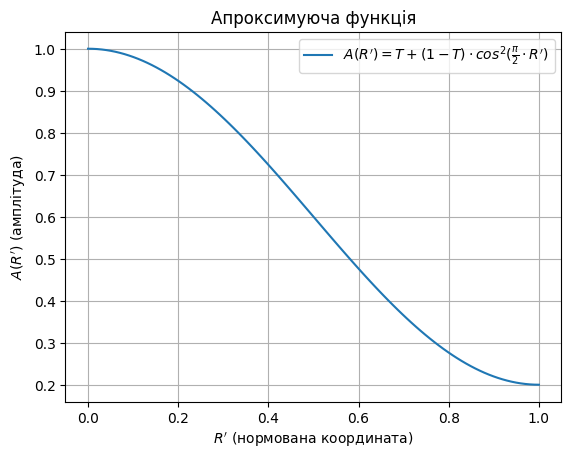

In [9]:
# Вхідні дані
T = 0.2
#T = np.linspace(0,1,10)

# Обчислення радіусу великого дзеркала
R_B = D_B/2

# Створення значень R'
R_values = np.linspace(0, R_B, 100) # Значення R від 0 до R_B
R_prime = R_values/R_B # Нормована поздовжня координата

# Обчислення амплітудного розподілу A(R')
#A_R_prime = 1-(1-T)*(R_prime)**2
A_R_prime = T+(1-T)*np.cos((np.pi/2)*R_prime)**2

print(f"Радіус великого дзеркала R_B = {round(R_B,3)}")
index = np.argmin(np.abs(R_prime-0.5))
print(f"Апроксимуюча функція A_R_prime = {round(A_R_prime[index],3)}")

# Побудова графіка
plt.plot(R_prime,A_R_prime,label=r"$A(R')=T+(1-T)\cdot cos^2(\frac{\pi}{2}\cdot R')$")
plt.xlabel(r"$R'$ (нормована координата)")
plt.ylabel(r"$A(R')$ (амплітуда)")
plt.title("Апроксимуюча функція")
plt.legend()
plt.grid()
plt.show()

12. Знаходимо апертурний КВП антени $ \nu_A $:

$$ \nu_A = \frac{2 \cdot \cot^2\left(\frac{\varphi_0}{2}\right) \cdot \left| \int_{\varphi_1}^{\varphi_0} \int_0^{2\pi} F_{\text{ОПР}}(\varphi, \xi) \cdot \tan\left(\frac{\varphi}{2}\right) \, d\varphi \, d\xi \right|^2}{2\pi \int_0^{\pi} \int_0^{2\pi} \left| F_{\text{ОПР}}(\varphi, \xi) \right|^2 \cdot \sin\varphi \, d\varphi \, d\xi} $$




In [10]:
"""varphi_1 = 0.077  # Початковий кут (rad)
resolution_varphi = 100  # Кількість точок для інтегрування по phi
resolution_xi = 100  # Кількість точок для інтегрування по xi

# Апроксимуюча функція F_ОПР
F_OPR = lambda varphi, xi: (1 / np.cos(varphi / 2))**2  # Задана функція

# Координати для інтегрування
varphi = np.linspace(varphi_1, varphi_0, resolution_varphi)
xi = np.linspace(0, 2 * np.pi, resolution_xi)
varphi, xi = np.meshgrid(varphi, xi)  # Створення сітки координат

# Обчислення чисельника
numerator = np.abs(
    np.sum(F_OPR(varphi, xi) * np.tan(varphi / 2)) * (varphi_0 - varphi_1) / resolution_varphi * (2 * np.pi / resolution_xi)
)**2

# Обчислення знаменника
denominator = 2 * np.pi * np.sum(
    np.abs(F_OPR(varphi, xi))**2 * np.sin(varphi)
) * (varphi_0 - varphi_1) / resolution_varphi * (2 * np.pi / resolution_xi)

# Розрахунок коефіцієнта використання потужності
nu_A_1 = 2 * (1 / np.tan(varphi_0 / 2))**2 * numerator / denominator

# Виведення результату
print(f"Апертурний коефіцієнт використання потужності ν_A_1 = {round(nu_A_1, 3)}")"""

nu_a = 0.85

13. Для розрахунку апертурного коефіцієнта сталого розподілу $\nu_A^p$ використовуємо формулу:
$$ \nu_A^p = 1 - 2\left(\frac{D_M}{D_B}\right)^2 $$
Порівнюємо отримане значення з коефіцієнтом, обчисленим на попередніх етапах, і вибираємо $ \nu_A $, знайдений на етапі 12 для подальших розрахунків. Це пояснюється тим, що формула $ nu_A^p $ отримана для опромінювача з постійною ДС
$$ F_{\text{опр}} = \sec\left(\frac{\varphi}{2}\right)^2 $$,
тоді як звичайні опромінювачі мають спадні ДС у межах $ 0 \leq \varphi \leq \varphi_0 $.

In [11]:
# Розрахунок апертурного коефіцієнта сталого розподілу
nu_A_p = 1 - 2 * (D_M / D_B) ** 2

# Виведення результату
print(f"КВП сталого розподілу ν_A^p = {round(nu_A_p, 3)}")

КВП сталого розподілу ν_A^p = 0.911


14. Коефіцієнт перехоплення $\eta_0$ енергії опромінювача малим дзеркалом:
$$\eta_0 = \frac{\int_{\varphi_1}^{\varphi_0} \int_0^{2\pi} F_{\text{ОПР}}^2(\varphi, \xi) \sin{\varphi} \, d\varphi \, d\xi}
{\int_0^{\pi} \int_0^{2\pi} F_{\text{ОПР}}^2(\varphi, \xi) \sin{\varphi} \, d\varphi \, d\xi}$$

In [12]:
"""# Межі інтеграції для phi та xi
xi_min = 0  # Мінімальна межа для xi
xi_max = 2 * np.pi  # Максимальна межа для xi
resolution_varphi = 100  # Кількість точок для інтегрування по phi
resolution_xi = 100  # Кількість точок для інтегрування по xi

# Опромінювач F_OPR, з формули F_{\text{ОПР}} = sec(phi / 2)^2
F_OPR = lambda varphi, xi: (1/np.cos(varphi/2))**2

# Координати для інтегрування
varphi = np.linspace(varphi_1, varphi_0, resolution_varphi)
xi = np.linspace(0, 2 * np.pi, resolution_xi)
varphi, xi = np.meshgrid(varphi, xi)  # Створення сітки координат

# Обчислення чисельника
num_integral_1 = np.sum(F_OPR(varphi, xi)**2 * np.sin(varphi)) * (varphi_0 - varphi_1) / resolution_varphi * (2 * np.pi / resolution_xi)

# Обчислення знаменника
num_integral_2 = np.sum(F_OPR(varphi, xi)**2 * np.sin(varphi)) * np.pi / resolution_varphi * (xi_max / resolution_xi)

# Обчислення коефіцієнта перехоплення
eta_0_1 = num_integral_1 / num_integral_2

# Виведення результату
print(f"Коефіцієнт перехоплення eta_0_1 = {round(eta_0_1, 3)}")"""

eta_0 = 0.83

15. Обчислюємо ККД $ \eta_З $ , що враховує втрати підсилення внаслідок затінення розкриву великого дзеркала конструкціями кріплення малого.
$$\eta_З = [1-\frac{\int_{S_З} A(R,\xi) ds}{\int_S A(R,\xi) ds}]^2$$
Площа окружності дорівнює:
$$ S = \frac{\pi * D_B^2}{4}  $$
Затінена частина це - проекція малого дзеркала на поверхню великого дзеркала:
$$ k = \frac{D_B}{D_M} $$

In [13]:
"""def aperture_function(R, xi):
    ""Функція апертури.""
    # комплексна функція з фазовим множником
    amplitude = 1  # Аплітуда
    phase_shift = np.pi * R / DM  # Фазовий зсув
    return amplitude * np.exp(-1j * phase_shift)

def calculate_efficiency(DB, DM):
    ""Обчислення ККД антени""

    S = np.pi * DM**2 / 4
    k = DB / DM
    S1 = k * S

    R_max = DM / 2
    xi_max = 2 * np.pi

    def integrand(xi, R):
        return np.abs(aperture_function(R, xi))**2 * R

    integral_numerator, _ = dblquad(integrand, 0, xi_max, 0, R_max * (1 - k))
    integral_denominator, _ = dblquad(integrand, 0, xi_max, 0, R_max)

    eta3 = (1 - integral_numerator / integral_denominator)**2
    return eta3

# Приклад використання з комплексною функцією апертури
DB = 2  # діаметр допоміжного дзеркала
DM = 10  # діаметр основного дзеркала
efficiency = calculate_efficiency(DB, DM)
print("ККД антени:", efficiency)"""

"""def aperture_function_gregory(R, xi, f):
    Функція апертури для антени Грегорі.

    Аргументи:
    R: Радіальна координата
    xi: Кутова координата
    f: Фокусна відстань головного дзеркала

    Повертає:
    Комплексне значення амплітуди поля в точці (R, xi)

    return np.exp(-(R/f)**2) * np.exp(-1j * xi)

def calculate_efficiency_gregory(D_B, D_M, f):

    Розрахунок ККД антени Грегорі


    S = np.pi * D_M**2 / 4
    k = D_B / D_M
    S1 = k * S

    R_max = D_M / 2
    xi_max = 2 * np.pi

    def integrand(xi, R):
        return np.abs(aperture_function_gregory(R, xi, f))**2 * R

    integral_numerator, _ = dblquad(integrand, 0, xi_max, 0, R_max * (1 - k))
    integral_denominator, _ = dblquad(integrand, 0, xi_max, 0, R_max)

    eta3 = (1 - integral_numerator / integral_denominator)**2
    return eta3

eta_z_1 = calculate_efficiency_gregory(D_B, D_M, f_B)
print("КПД антенны Грегори:", eta_z_1)"""

eta_z = 0.955

16. Знаходимо результуючий КВП АГ $ \nu_{рез} $. Значення коефіцієнтів, які не розраховувались, наведено наприкінці підрозд. 13.3. Якщо значення одержаного $ \nu_{рез} $ набагато відрізняється від вибраного у п. 1 при обчисленні $D_B$ за КП, усі попередні розрахунки повторюємо зі знайденим тут $ \nu_{рез} $.
$$ \nu_{рез} = \nu_A \eta_0 \eta_Ф \eta_{КП} \eta_Д \eta_З \eta_Н \eta_У \eta_{СХ} \eta_Т = \nu_A \eta_A $$

In [14]:
nu_A = 0.85
eta_0 = 0.83
eta_f = 0.955
eta_kp = 0.955
eta_d = 0.92
eta_z = 0.955
eta_n = 0.955
eta_u = 0.977
eta_sh = 0.5
eta_t = 0.977
nu_rez = nu_A*eta_0*eta_f*eta_kp*eta_d*eta_z*eta_n*eta_u*eta_sh*eta_t

print(f"Результуючий КВП АГ nu_rez = {round(nu_rez, 3)}")

Результуючий КВП АГ nu_rez = 0.258


17. П’єдестали амплітудного розподілу у площинах E та H знаходимо за формулами (13.51), (13.52) – для пірамідального.
- у площині Е
$$ cos(\frac{\varphi_0}{2})^4 * \frac{sin(\frac{\pi*b_p}{\lambda}*sin(\varphi_0))}{\frac{\pi*b_p}{\lambda}*sin(\varphi_0)} = T_E $$
- у площині Н
$$ cos(\frac{\varphi_0}{2})^4 * \frac{cos(\frac{\pi*a_p}{\lambda}*sin(\varphi_0))}{1-(\frac{2*a_p}{\lambda}*sin(\varphi_0))} = T_H $$
$$ a_p = 1,5*b_p $$
$$ b_p = D_0 * \sqrt{\pi/6} $$

In [15]:
b_p = D_0 * np.sqrt(np.pi / 6)
a_p = b_p * 1.5

# Обчислення п'єдесталу у площині Е

numerator = np.sin((np.pi * b_p / wavelenght_0) * np.sin(varphi_0))
denominator = (np.pi * b_p / wavelenght_0) * np.sin(varphi_0)
T_E = (np.cos(varphi_0 / 2)**4) * (numerator / denominator)

# Обчислення п'єдесталу у площині Н

numerator = np.cos((np.pi * a_p / wavelenght_0) * np.sin(varphi_0))
denominator = 1 - ((2 * b_p / wavelenght_0) * np.sin(varphi_0))
T_H = (np.cos(varphi_0 / 2)**4) * (numerator / denominator)

print(f"П’єдестали амплітудного розподілу у площині E = {round(T_E, 3)}")
print(f"П’єдестали амплітудного розподілу у площині H = {round(T_H, 3)}")

П’єдестали амплітудного розподілу у площині E = 0.244
П’єдестали амплітудного розподілу у площині H = 1.421


18. Відповідно до апроксимуючої функції амплітудного розподілу розраховуємо ДС незатіненої антени у площинах E та H на середній довжині хвилі діапазону за формулами:
$$ F_E(\theta) = \frac{T*\frac{J_1(u)}{u}+B(u)}{\frac{T}{4}+0,1487*(1-\frac{T}{2})}*cos^2(\frac{\theta}{2}) $$
$$ B(u) = \frac{T}{2}*[2*\frac{J_0(u)-1}{u^2}+æ_2(u)]+(1-\frac{T}{2})*æ_0(u) $$
$$ u = k * R_B * sin(\theta) $$
$ k = 2 * \pi / \lambda $ - для середньої довжині хвилі діапазону

u_value = 1.294


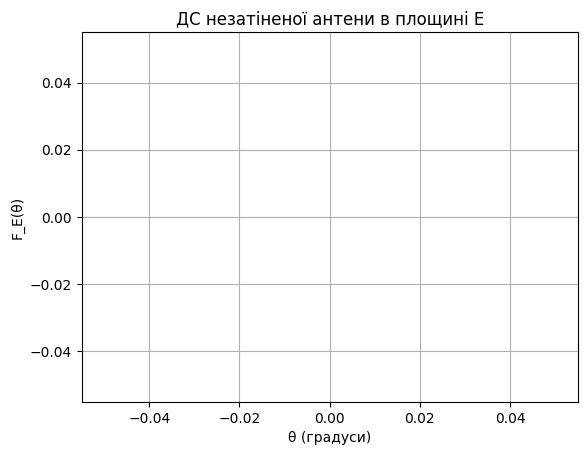

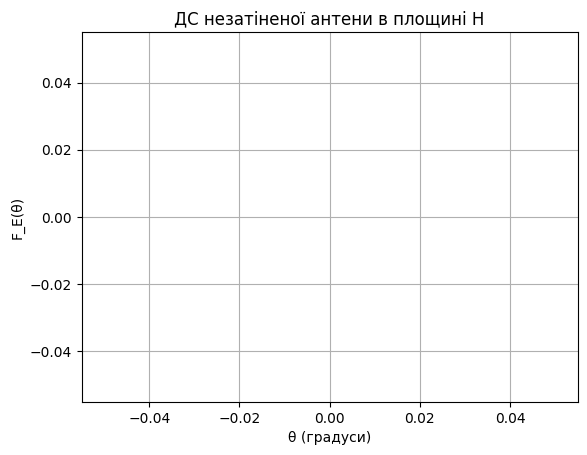

In [42]:
eps = 0.0001
theta = 0.017 # задали крок в 1 градус в радіанах
theta_range = np.arange(np.pi/2 + eps, np.pi/2 - eps, 0.001)
#theta_range = np.arange(0.01, np.pi / 2, 0.001)  # Різні кути θ

# Функція для обчислення B(u)
def B(u, T_):
    # Обрали функції Бесселя 0, 1 порядків та значення інтегралів
    J_0 = 0.62
    ae_0 = 0.1327
    ae_2 = 0.0080
    term1 = (T_ / 2) * (2 * (J_0 - 1) / u**2 + ae_2)
    term2 = (1 - T_ / 2) * ae_0
    return term1 + term2

# Функція для обчислення F_E(θ)
def F_E(theta, u, T_):
    # Обрали функції Бесселя 0, 1 порядків та значення інтегралів
    J_1 = 0.522
    numerator = T_ * (J_1 / u) + B(u, T_)
    denominator = (T_ / 4) + 0.1487 * (1 - T_ / 2)

    return (numerator / denominator) * np.cos(theta / 2)**2

# Функція для обчислення u
def u(R_B, wavelenght, theta):
    # Знаходимо коефіцієнт k
    k = 2 * np.pi / wavelenght
    return k * R_B * np.sin(theta)

u_mid = u(R_B, wavelenght_0, theta_range)
u_value = u(R_B, wavelenght_0, theta)

print(f"u_value = {np.round(u_value, 3)}")

# Обчислення значень F_E(θ) для площини Е
F_E_mid_E = F_E(theta_range, u_mid, T_E)

# Обчислення значень F_E(θ) для площини H
F_E_mid_H = F_E(theta_range, u_mid, T_H)

steps = np.degrees(theta_range)

# Виведення результату для Е
plt.plot(steps, F_E_mid_E)
plt.xlabel('θ (градуси)')
plt.ylabel('F_E(θ)')
plt.title('ДС незатіненої антени в площині E')
plt.grid(True)
plt.show()

# Виведення результату для Н
plt.plot(steps, F_E_mid_H)
plt.xlabel('θ (градуси)')
plt.ylabel('F_E(θ)')
plt.title('ДС незатіненої антени в площині Н')
plt.grid(True)
plt.show()


19. За тими ж виразами обчислюємо ДС незатіненої антени на
крайніх довжинах хвиль діапазону, знайдених за формулами:
$$ \lambda_{min} = \lambda_0 * (1 - \frac{\Delta\lambda}{\lambda_0})$$
$$ \lambda_{max} = \lambda_0 * (1 + \frac{\Delta\lambda}{\lambda_0}) $$

In [33]:
# Розрахунок мін і макс довжину хвилі
delta_lambda = (0.1 * wavelenght_0) / 2
wavelenght_min = wavelenght_0 * (1 - (delta_lambda/wavelenght_0))
wavelenght_max = wavelenght_0 * (1 + (delta_lambda/wavelenght_0))

print(wavelenght_min, wavelenght_max)

# Обчислення u на мін і макс довжині хвилі
u_min = u(R_B, wavelenght_min, theta_range)
u_max = u(R_B, wavelenght_max, theta_range)

# Розрахунок F_E для площини E

F_E_min_E = F_E(theta_range, u_min, T_E)
F_E_max_E = F_E(theta_range, u_max, T_E)

# Розрахунок F_E для площини H

F_E_min_H = F_E(theta_range, u_min, T_H)
F_E_max_H = F_E(theta_range, u_max, T_H)

0.028499999999999998 0.0315


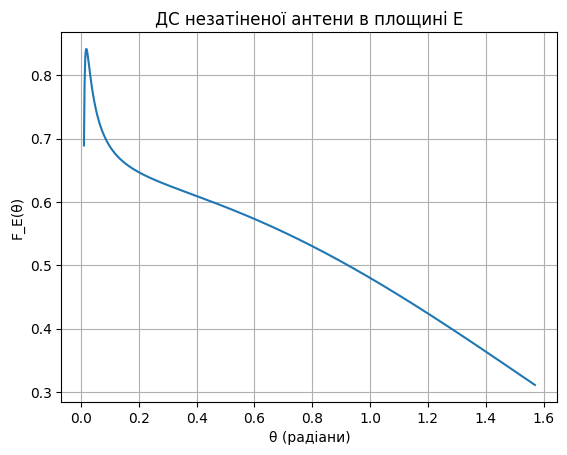

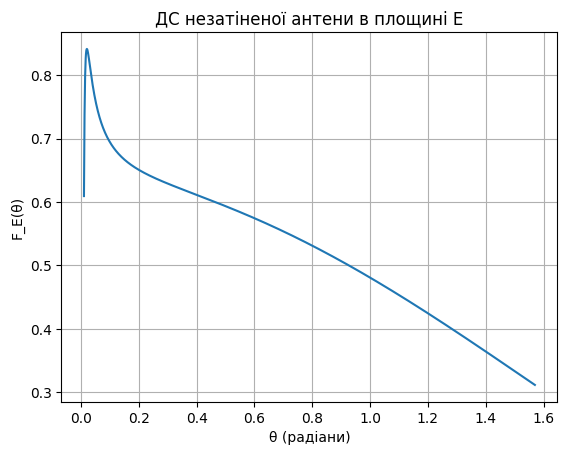

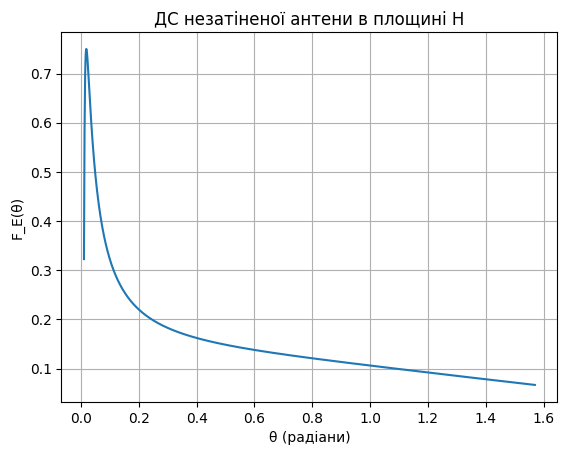

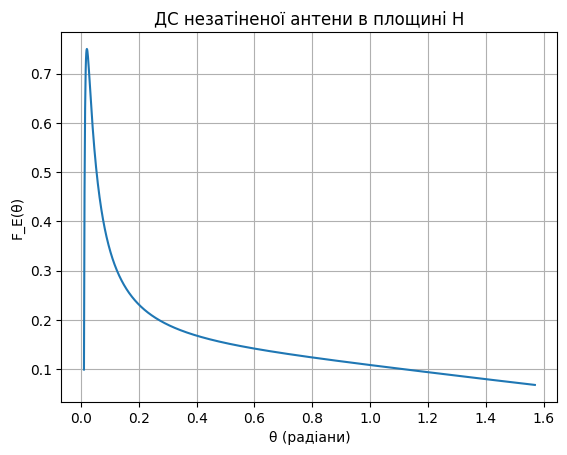

In [34]:
# Виведення результату для Е
plt.plot(theta_range, F_E_min_E)
plt.xlabel('θ (радіани)')
plt.ylabel('F_E(θ)')
plt.title('ДС незатіненої антени в площині E')
plt.grid(True)
plt.show()

plt.plot(theta_range, F_E_max_E)
plt.xlabel('θ (радіани)')
plt.ylabel('F_E(θ)')
plt.title('ДС незатіненої антени в площині E')
plt.grid(True)
plt.show()

# Виведення результату для Н
plt.plot(theta_range, F_E_min_H)
plt.xlabel('θ (радіани)')
plt.ylabel('F_E(θ)')
plt.title('ДС незатіненої антени в площині Н')
plt.grid(True)
plt.show()

plt.plot(theta_range, F_E_max_H)
plt.xlabel('θ (радіани)')
plt.ylabel('F_E(θ)')
plt.title('ДС незатіненої антени в площині Н')
plt.grid(True)
plt.show()

20. Розраховуємо ДС антени на середній і крайніх довжинах хвиль діапазону з урахуванням затінення великого дзеркала АГ малим, користуючись виразом:
$$ F(\theta) = \frac{F_{НЕЗ}(\theta)-(D_M/D_B)^2*\Lambda_1(k*R_M*sin\theta)}{1-(D_M/D_B)^2} $$
$ \Lambda_1(u) = 2*J_1(u)/u $ - лямбда-функція першого порядку

In [35]:
R_M = D_M / 2  # Радіус малого дзеркала (в метрах)
u_lambda_1 = u(R_M, wavelenght_0, theta)
print(f"u_lambda_1 = {round(u_lambda_1, 3)}")
J_1l = 0.148

u_lambda_1 = 0.273


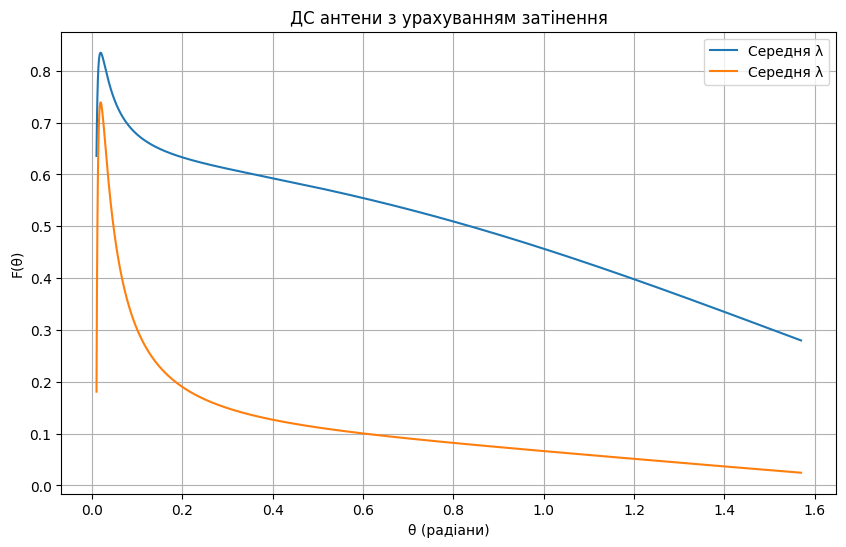

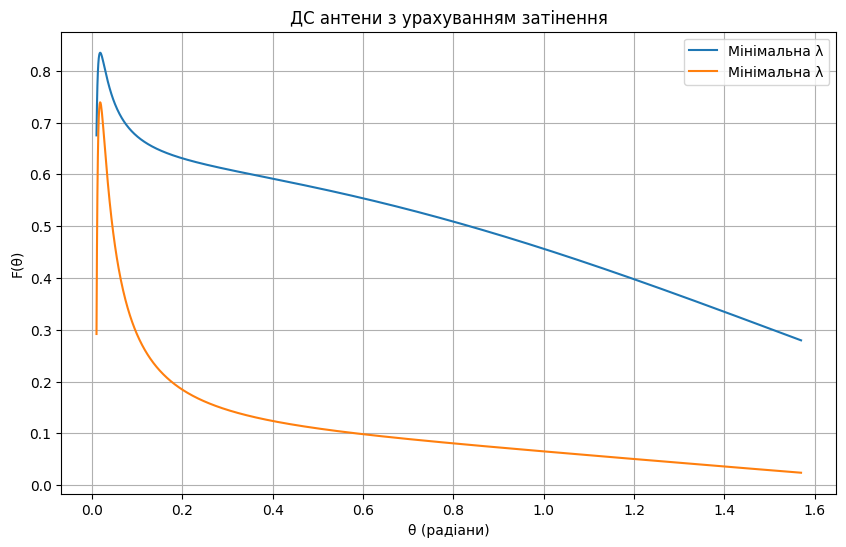

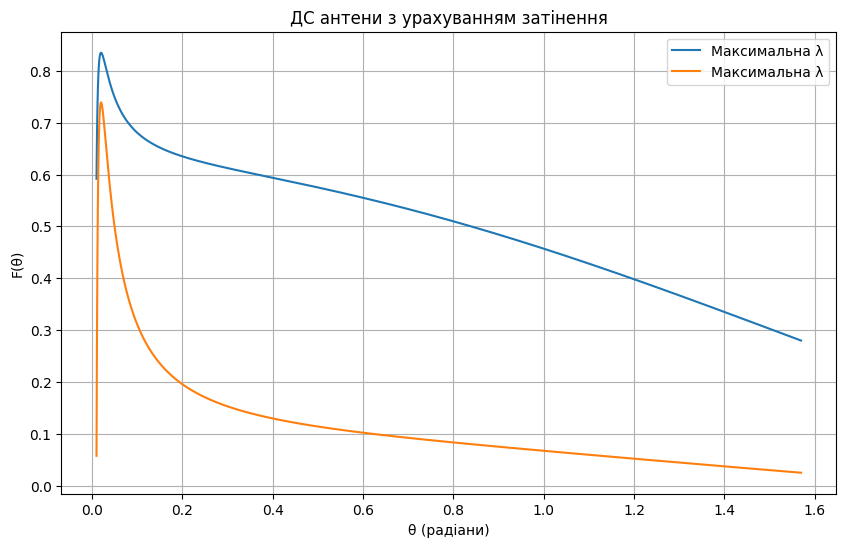

In [36]:
Lambda_1 = 0.9888

# Функція для F(theta) з урахуванням затінення
def F(F_E, D_M, D_B, Lambda_1):
    numerator = F_E - (D_M / D_B)**2 * Lambda_1
    denominator = 1 - (D_M / D_B)**2
    return numerator / denominator

# Обчислення для середньої довжини хвилі
F_mid_E = F(F_E_mid_E, D_M, D_B, Lambda_1)
F_mid_H = F(F_E_mid_H, D_M, D_B, Lambda_1)

# Обчислення для мінімальної довжини хвилі
F_min_E = F(F_E_min_E, D_M, D_B, Lambda_1)
F_min_H = F(F_E_min_H, D_M, D_B, Lambda_1)

# Обчислення для максимальної довжини хвилі
F_max_E = F(F_E_max_E, D_M, D_B, Lambda_1)
F_max_H = F(F_E_max_H, D_M, D_B, Lambda_1)

# Побудова графіків
plt.figure(figsize=(10, 6))
plt.plot(theta_range, F_mid_E, label='Середня λ')
plt.plot(theta_range, F_mid_H, label='Середня λ')
plt.xlabel('θ (радіани)')
plt.ylabel('F(θ)')
plt.title('ДС антени з урахуванням затінення')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(theta_range, F_min_E, label='Мінімальна λ')
plt.plot(theta_range, F_min_H, label='Мінімальна λ')
plt.xlabel('θ (радіани)')
plt.ylabel('F(θ)')
plt.title('ДС антени з урахуванням затінення')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(theta_range, F_max_E, label='Максимальна λ')
plt.plot(theta_range, F_max_H, label='Максимальна λ')
plt.xlabel('θ (радіани)')
plt.ylabel('F(θ)')
plt.title('ДС антени з урахуванням затінення')
plt.legend()
plt.grid(True)
plt.show()

21. За побудованими у пп. 18 – 20 ДС визначаємо ширину їхніх головних пелюсток за половинною потужністю та за нулями і рівні перших трьох бокових пелюсток. Обов’язково порівнюємо вторинні параметри ДС на різних частотах і з урахуванням затінення.

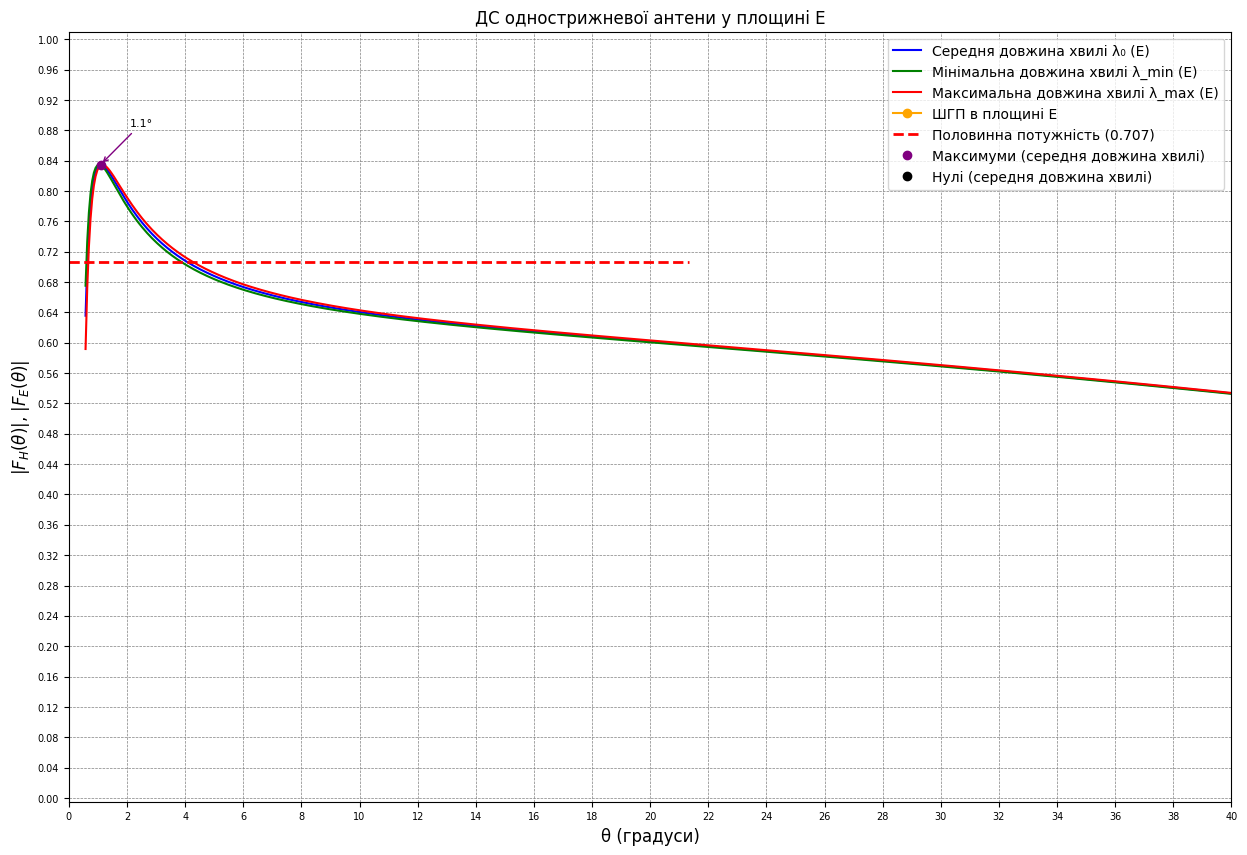

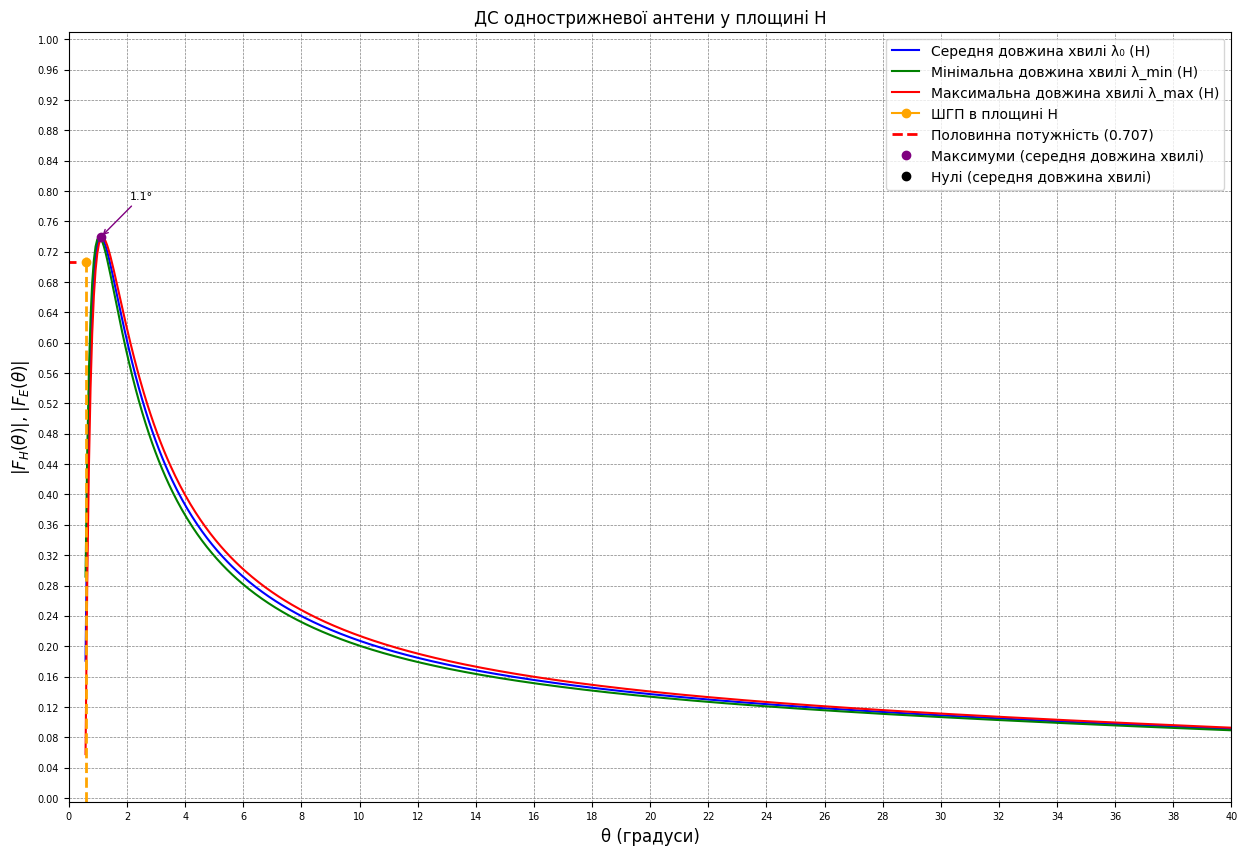

In [39]:
from scipy.signal import find_peaks


# Функція для знаходження ширини головної пелюстки на рівні половинної потужності
def find_half_power_angle(F_mid, theta_range):
    return np.interp(0.5, F_mid[::-1], np.degrees(theta_range[::-1]))

# Знаходження ширини головної пелюстки на рівні половинної потужності для площини E
half_power_angle_mid_E = find_half_power_angle(F_mid_E, theta_range)

# Знаходження ширини головної пелюстки на рівні половинної потужності для площини H
half_power_angle_mid_H = find_half_power_angle(F_mid_H, theta_range)

# Знаходження максимумів і мінімумів
def find_peaks_and_troughs(F_theta, theta_range):
    """Знаходження максимумів та нулів (мінімумів) у функції F_eta."""
    # Знаходимо піки (максимуми)
    peaks, _ = find_peaks(F_theta)
    peaks_x = np.degrees(theta_range[peaks])
    peaks_y = F_theta[peaks]

    # Знаходимо мінімуми (інвертуємо функцію і шукаємо піки)
    troughs, _ = find_peaks(-F_theta)
    troughs_x = np.degrees(theta_range[troughs])
    troughs_y = F_theta[troughs]

    return peaks_x, peaks_y, troughs_x, troughs_y

# Функція для побудови ДС з максимумами і нулями
def plot_diagram_with_peaks(F_mid, F_min, F_max, theta_range, half_power_angle, plane_label):
    # Графік для площини E або H
    plt.figure(figsize=(15, 10))

    # Побудова графіків ДС для середньої, мінімальної і максимальної довжин хвиль
    plt.plot(np.degrees(theta_range), F_mid, label=f'Середня довжина хвилі λ₀ ({plane_label})', linewidth=1.5, color='blue')
    plt.plot(np.degrees(theta_range), F_min, label=f'Мінімальна довжина хвилі λ_min ({plane_label})', linewidth=1.5, color='green')
    plt.plot(np.degrees(theta_range), F_max, label=f'Максимальна довжина хвилі λ_max ({plane_label})', linewidth=1.5, color='red')

    # Позначаємо знайдені інтерпольовані точки для ШГП
    plt.plot(half_power_angle, 0.707, marker="o", color='orange', label=f"ШГП в площині {plane_label}")

    # Додаємо вертикальні та горизонтальні лінії для ШГП
    plt.axhline(y=0.707, xmin=0, xmax=half_power_angle/90, color="red", linestyle="dashed", label="Половинна потужність (0.707)", linewidth=2)
    plt.axvline(x=half_power_angle, ymin=0, ymax=0.707, color="orange", linestyle="dashed", linewidth=2)

    # Додаємо максимумів та нулів для середньої довжини хвилі
    peaks_x, peaks_y, troughs_x, troughs_y = find_peaks_and_troughs(F_mid, theta_range)

    plt.plot(peaks_x, peaks_y, "o", color="purple", label="Максимуми (середня довжина хвилі)")
    plt.plot(troughs_x, troughs_y, "o", color="black", label="Нулі (середня довжина хвилі)")

    for px, py in zip(peaks_x, peaks_y):
        plt.annotate(f'{px:.1f}\u00b0', xy=(px, py), xytext=(px + 1, py + 0.05), fontsize=8,
                     arrowprops=dict(arrowstyle='->', color='purple'))

    for tx, ty in zip(troughs_x, troughs_y):
        plt.annotate(f'{tx:.1f}\u00b0', xy=(tx, ty), xytext=(tx - 2, ty - 0.1), fontsize=8,
                     arrowprops=dict(arrowstyle='->', color='black'))

    # Форматування графіку
    plt.xlabel("θ (градуси)", fontsize=12)
    plt.ylabel("$|F_H(\\theta)|$, $|F_E(\\theta)|$", fontsize=12)
    plt.legend(loc="upper right", fontsize=10)
    plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
    plt.title(f"ДС однострижневої антени у площині {plane_label}", fontsize=12)

    # Налаштування візуалізації осей
    plt.xticks(np.arange(0, 100, 2), fontsize=7)
    plt.yticks(np.arange(0, 1.2, 0.04), fontsize=7)
    plt.ylim(-0.005, 1.01)
    plt.xlim(0, 40)

    plt.show()

# Побудова графіка для площини E
plot_diagram_with_peaks(F_mid_E, F_min_E, F_max_E, theta_range, half_power_angle_mid_E, 'E')

# Побудова графіка для площини H
plot_diagram_with_peaks(F_mid_H, F_min_H, F_max_H, theta_range, half_power_angle_mid_H, 'H')